#Stock Price Analysis, Prediction and Forecasting

                                                                                  By: 
                                                                                  Kota Vinay Kumar
                                                                                  Sai Vijay Panuganti
                                                                                  Sathish Reddy Bathula

In [ ]:
!pip3 install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
!pip3 install fredapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install plotly==5.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 19.2 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)
import seaborn as sns
import datetime
import seaborn as sns
import yfinance as yf
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

- For our analysis, we have taken for banks CapitalOne, Bank of America, JPMorgan Chase and Citigroup and S&P 500 as our market index.
- We are first going to find the bank with the best risk return relationship for investment.
- Then we will perform the time series analysis on the bank stock then forecast the stock price using the best model among the models used.

In [ ]:
stocks = ['COF', 'BAC', 'JPM', 'C', '^GSPC']
start = datetime.datetime(2021, 1, 1)
end = datetime.datetime(2022, 9, 1)
port = yf.download(stocks, start=start, end=end, interval='1d')['Close']

[*********************100%***********************]  5 of 5 completed


In [ ]:
port.head()

,BAC,C,COF,JPM,^GSPC
Date,,,,,
2021-01-04,30.030001,60.139999,97.839996,125.870003,3700.649902
2021-01-05,30.260000,61.700001,100.139999,125.650002,3726.860107
2021-01-06,32.150002,65.250000,107.379997,131.550003,3748.139893
2021-01-07,32.860001,66.019997,110.730003,135.869995,3803.790039
2021-01-08,32.529999,65.370003,110.559998,136.020004,3824.679932


In [ ]:
port.tail()

,BAC,C,COF,JPM,^GSPC
Date,,,,,
2022-08-25,35.139999,52.060001,113.660004,118.550003,4199.120117
2022-08-26,34.029999,49.779999,109.820000,114.669998,4057.659912
2022-08-29,33.900002,49.369999,107.199997,114.389999,4030.610107
2022-08-30,34.090000,49.080002,106.830002,114.410004,3986.159912
2022-08-31,33.610001,48.810001,105.820000,113.730003,3955.000000


In [ ]:
# changing the name of ^GSPC column to GSPC for easy use along the away
port = port.rename({'^GSPC':'GSPC'}, axis='columns')

In [ ]:
port.isnull().sum()

BAC     0
C       0
COF     0
JPM     0
GSPC    0
dtype: int64

- There are no null values, so the data is good.

In [ ]:
port.describe()

,BAC,C,COF,JPM,GSPC
count,419.000000,419.000000,419.000000,419.000000,419.000000
mean,39.750907,63.415084,139.268138,145.609642,4253.186445
std,4.927757,9.131272,20.852106,17.443060,281.285980
min,29.650000,44.139999,97.839996,108.000000,3666.770020
25%,35.960001,54.170000,121.720001,131.380005,4012.915039
50%,40.040001,66.080002,141.679993,151.649994,4266.490234
75%,43.264999,70.900002,157.149994,158.735001,4471.219971
max,49.380001,79.860001,177.729996,171.779999,4796.560059


- From the above summmary statistics of the stocks above we can see the count, mean, std, min, max values of all the stocks. We can see that mean of GSPC is very large compared to our other stocks.

- The standard deviation here tells us how volatile the stock is during that period of time. The higher SD, higher volatility, Higher risk/return rates.
Here Capital one Finance, has the highest volatility than the rest







- Now We are going to get risk free rates, for that we will import Fred from fredapi.

In [ ]:
from fredapi import Fred
fred = Fred(api_key='78b14ec6ba46f484b94db43694468bb1')

In [ ]:
fred.search('risk free')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
DGS10,DGS10,2022-10-26,2022-10-26,Market Yield on U.S. Treasury Securities at 10...,1962-01-02,2022-10-24,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2022-10-25 15:19:08-05:00,93,For further information regarding treasury con...
GS10,GS10,2022-10-26,2022-10-26,Market Yield on U.S. Treasury Securities at 10...,1953-04-01,2022-09-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-10-03 15:23:11-05:00,73,Averages of business days. For further informa...
WGS10YR,WGS10YR,2022-10-26,2022-10-26,Market Yield on U.S. Treasury Securities at 10...,1962-01-05,2022-10-21,"Weekly, Ending Friday",W,Percent,%,Not Seasonally Adjusted,NSA,2022-10-24 15:23:01-05:00,56,Averages of business days. For further informa...
DGS2,DGS2,2022-10-26,2022-10-26,Market Yield on U.S. Treasury Securities at 2-...,1976-06-01,2022-10-24,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2022-10-25 15:19:13-05:00,82,For further information regarding treasury con...
GS2,GS2,2022-10-26,2022-10-26,Market Yield on U.S. Treasury Securities at 2-...,1976-06-01,2022-09-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-10-03 15:23:23-05:00,45,Averages of business days. For further informa...
DGS1,DGS1,2022-10-26,2022-10-26,Market Yield on U.S. Treasury Securities at 1-...,1962-01-02,2022-10-24,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2022-10-25 15:19:08-05:00,80,For further information regarding treasury con...
WGS2YR,WGS2YR,2022-10-26,2022-10-26,Market Yield on U.S. Treasury Securities at 2-...,1976-06-04,2022-10-21,"Weekly, Ending Friday",W,Percent,%,Not Seasonally Adjusted,NSA,2022-10-24 15:23:06-05:00,35,Averages of business days. For further informa...
DGS5,DGS5,2022-10-26,2022-10-26,Market Yield on U.S. Treasury Securities at 5-...,1962-01-02,2022-10-24,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2022-10-25 15:19:16-05:00,79,For further information regarding treasury con...
WGS1YR,WGS1YR,2022-10-26,2022-10-26,Market Yield on U.S. Treasury Securities at 1-...,1962-01-05,2022-10-21,"Weekly, Ending Friday",W,Percent,%,Not Seasonally Adjusted,NSA,2022-10-24 15:23:03-05:00,56,Averages of business days. For further informa...


- For our analysis, from the different series about risk free rates, We are going to select the series 'DGS3MO' series, which has the daily risk free rates.

In [ ]:
risk_free = fred.get_series('DGS3MO')
risk_free = risk_free['2021-01-01':'2022-09-01']
risk_free

2021-01-01     NaN
2021-01-04    0.09
2021-01-05    0.09
2021-01-06    0.09
2021-01-07    0.09
              ... 
2022-08-26    2.89
2022-08-29    2.97
2022-08-30    2.97
2022-08-31    2.96
2022-09-01    2.97
Length: 435, dtype: float64

In [ ]:
risk_free = risk_free.dropna().iloc[:-1]
len(risk_free)

418

In [ ]:
len(port.iloc[1:])

418

- Now we have the length of our stocks data and risk free rates as same, we can do our analysis.

- First we are going to plot our four stocks and market index to see how they change over our time period.

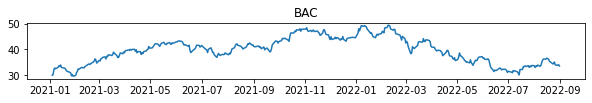

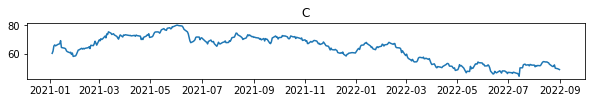

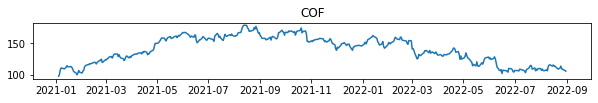

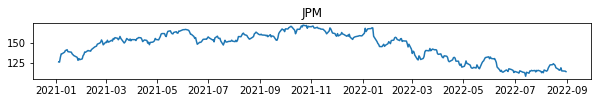

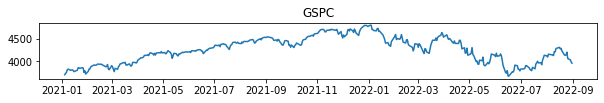

In [ ]:
# plotting all our stocks
for i, stock in enumerate(port.columns, start=1):
    plt.figure(figsize=(10, 6))
    plt.subplot(5, 1, i)
    plt.plot(port[stock])
    plt.title(f'{stock}')
    plt.show()

- Correlation is an important tool to find how the stocks and the market index are correlated with eachother.

In [ ]:
port.corr()

,BAC,C,COF,JPM,GSPC
BAC,1.000000,0.512437,0.803104,0.779529,0.856887
C,0.512437,1.000000,0.714984,0.883498,0.263103
COF,0.803104,0.714984,1.000000,0.846545,0.727511
JPM,0.779529,0.883498,0.846545,1.000000,0.600330
GSPC,0.856887,0.263103,0.727511,0.600330,1.000000


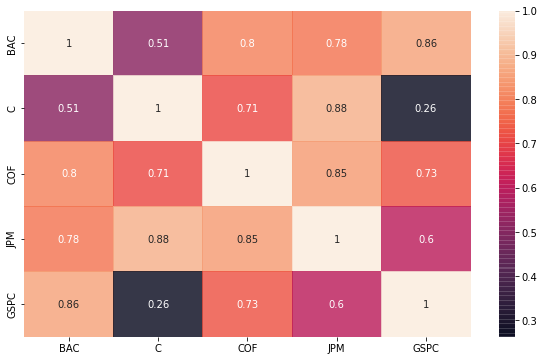

In [ ]:
sns.heatmap(port.corr(),alpha=0.8,annot=True)

Bank of America followed by Capital One finance depends a lot on the change in the market index

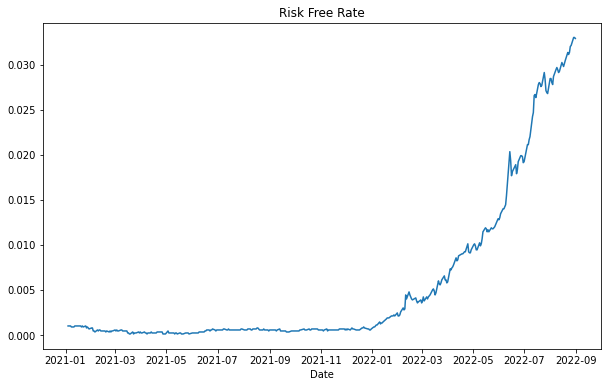

In [ ]:
# our risk free rate is for 3months and easy way to convert it to daily is divide it by 90
risk_free = risk_free/90

# plotting daily risk free rate
plt.plot(risk_free)
plt.title('Risk Free Rate')
plt.xlabel('Date')
plt.show()

- Next to calculate the returns of the stocks and market index we can use pct_change() method, it will give the returns.

In [ ]:
returns = port.pct_change().dropna() # dropna to drop null values
returns.head()

,BAC,C,COF,JPM,GSPC
Date,,,,,
2021-01-05,0.007659,0.025939,0.023508,-0.001748,0.007083
2021-01-06,0.062459,0.057536,0.072299,0.046956,0.005710
2021-01-07,0.022084,0.011801,0.031198,0.032839,0.014847
2021-01-08,-0.010043,-0.009845,-0.001535,0.001104,0.005492
2021-01-11,0.016600,0.016368,-0.011306,0.014924,-0.006555


In [ ]:
returns.describe().loc['std']

BAC     0.018110
C       0.018825
COF     0.022256
JPM     0.016035
GSPC    0.011456
Name: std, dtype: float64

##CAPM analysis

- To run the CAPM we first need to calculate excess return.

In [ ]:
# excess return
stocks = port.columns
for i in stocks:
    returns[f"excess_return_{i}"] = returns[i] - risk_free

In [ ]:
returns.head()

,BAC,C,COF,JPM,GSPC,excess_return_BAC,excess_return_C,excess_return_COF,excess_return_JPM,excess_return_GSPC
Date,,,,,,,,,,
2021-01-05,0.007659,0.025939,0.023508,-0.001748,0.007083,0.006659,0.024939,0.022508,-0.002748,0.006083
2021-01-06,0.062459,0.057536,0.072299,0.046956,0.005710,0.061459,0.056536,0.071299,0.045956,0.004710
2021-01-07,0.022084,0.011801,0.031198,0.032839,0.014847,0.021084,0.010801,0.030198,0.031839,0.013847
2021-01-08,-0.010043,-0.009845,-0.001535,0.001104,0.005492,-0.010932,-0.010734,-0.002424,0.000215,0.004603
2021-01-11,0.016600,0.016368,-0.011306,0.014924,-0.006555,0.015711,0.015479,-0.012195,0.014035,-0.007444


In [ ]:
returns.dropna(inplace=True)

- Now we are ready to run CAPM.

In [ ]:
# running CAPM
import statsmodels.api as sm

In [ ]:
y_cof = returns['excess_return_COF']
X = returns['excess_return_GSPC']

In [ ]:
X = sm.add_constant(X, prepend=False)
capm_cof = sm.OLS(y_cof, X)
capm_result_cof = capm_cof.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
capm_result_cof.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      excess_return_COF   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     374.4
Date:                Wed, 26 Oct 2022   Prob (F-statistic):           7.05e-60
Time:                        17:06:35   Log-Likelihood:                 1088.5
No. Observations:                 416   AIC:                            -2173.
Df Residuals:                     414   BIC:                            -2165.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
excess_return_GSPC     1.1387      0.059     19.349      0.000       1.023       1.254
const                  0.0010      0.001      1.035      0.301      -0.001       0.003
==============================================================================
Omnibus:                       27.821   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.068
Skew:                          -0.351   Prob(JB):                     5.49e-14
Kurtosis:                       4.741   Cond. No.                         67.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
capm_result_cof.params[0] # beta coefficient

1.1387406431144989

 - As the p-value is zero, we can reject the null hypothesis. Here for CapitalOne the coefficeint is 1.138, it means CpaitalOne is very much volatile as GSPC. for 1 unit change in GSPC, there is 1.138 units change in CapitalOne. It suggests CapitalOne is riskier than market.

In [ ]:
y_bac = returns['excess_return_BAC']
X = returns['excess_return_GSPC']

In [ ]:
y_bac = returns['excess_return_BAC']
X = returns['excess_return_GSPC']

In [ ]:
X = sm.add_constant(X, prepend=False)
capm_bac = sm.OLS(y_bac, X)
capm_result_bac = capm_bac.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
capm_result_bac.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      excess_return_BAC   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     413.9
Date:                Wed, 26 Oct 2022   Prob (F-statistic):           2.77e-64
Time:                        17:06:35   Log-Likelihood:                 1170.9
No. Observations:                 416   AIC:                            -2338.
Df Residuals:                     414   BIC:                            -2330.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
excess_return_GSPC     0.9821      0.048     20.344      0.000       0.887       1.077
const                  0.0001      0.001      0.153      0.878      -0.001       0.002
==============================================================================
Omnibus:                       15.473   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.475
Skew:                           0.351   Prob(JB):                     5.90e-05
Kurtosis:                       3.794   Cond. No.                         67.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
capm_result_bac.params[0]

0.9821150569910654

 - As the p-value is zero, we can reject the null hypothesis. Here for BankofAmerica the coefficeint is 0.982, it means BankofAmerica is less volatile as GSPC. for 1 unit change in GSPC, there is only 0.982 units change in BankofAmerica. It suggests BankofAmerica is a little less riskier than market.

In [ ]:
y_jpm = returns['excess_return_JPM']
X = returns['excess_return_GSPC']

In [ ]:
X = sm.add_constant(X, prepend=False)
capm_jpm = sm.OLS(y_jpm, X)
capm_result_jpm = capm_jpm.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
capm_result_jpm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      excess_return_JPM   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     490.1
Date:                Wed, 26 Oct 2022   Prob (F-statistic):           3.22e-72
Time:                        17:06:35   Log-Likelihood:                 1229.3
No. Observations:                 416   AIC:                            -2455.
Df Residuals:                     414   BIC:                            -2446.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
excess_return_GSPC     0.9288      0.042     22.138      0.000       0.846       1.011
const                 -0.0007      0.001     -1.036      0.301      -0.002       0.001
==============================================================================
Omnibus:                       24.397   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.613
Skew:                          -0.146   Prob(JB):                     2.81e-16
Kurtosis:                       5.011   Cond. No.                         67.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
capm_result_jpm.params[0]

0.9288460331800092

- As the p-value is zero, we can reject the null hypothesis. Here for JPMorgan Chase the coefficeint is 0.928, it means JPMorgan Chase is less volatile as GSPC. for 1 unit change in GSPC, there is only 0.928 units change in JPMorgan Chase. It suggests JPMorgan Chase is a little less riskier than market.

In [ ]:
y_c = returns['excess_return_C']
X = returns['excess_return_GSPC']

In [ ]:
X = sm.add_constant(X, prepend=False)
capm_c = sm.OLS(y_c, X)
capm_result_c = capm_c.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
capm_result_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        excess_return_C   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     336.0
Date:                Wed, 26 Oct 2022   Prob (F-statistic):           2.23e-55
Time:                        17:06:35   Log-Likelihood:                 1143.3
No. Observations:                 416   AIC:                            -2283.
Df Residuals:                     414   BIC:                            -2275.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
excess_return_GSPC     0.9456      0.052     18.330      0.000       0.844       1.047
const                 -0.0009      0.001     -1.058      0.291      -0.002       0.001
==============================================================================
Omnibus:                      124.372   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1061.666
Skew:                           1.014   Prob(JB):                    2.90e-231
Kurtosis:                      10.559   Cond. No.                         67.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
capm_result_c.params[0]

0.9455887767513395

- As the p-value is zero, we can reject the null hypothesis. Here for Citigroup the coefficeint is 0.945, it means Citigroup is less volatile as GSPC. for 1 unit change in GSPC, there is only 0.945 units change in Citigroup. It suggests Citigroup is a little less riskier than market.

In [ ]:
# sharpe ratio function
def sharpe(stocks, rf, n_assets):
    sharpe_ratios = {}
    for i,j in zip(stocks, range(n_assets)):
        sharpe_ratios[i] = round((returns.iloc[:, j].mean() - rf) / np.std(returns.iloc[:, j]), 4)
    return sharpe_ratios

In [ ]:
# treynor ratio function
def treynor(stocks, rf, n_assets):
    treynor_ratios = {}
    for i, stock in enumerate(stocks):
        treynor_ratios[stock] = round((returns.iloc[:, i].mean() - rf) / df_betas[0][stock], 4)
    return treynor_ratios

In [ ]:
# all inputs needed to calculate our ratios
betas = [capm_result_cof.params[0], capm_result_bac.params[0], capm_result_jpm.params[0], capm_result_c.params[0]]
df_betas = pd.DataFrame(betas)
df_betas.index = returns.columns[:4]
df_betas

,0
BAC,1.138741
C,0.982115
COF,0.928846
JPM,0.945589


In [ ]:
returns.columns[:4]

Index(['BAC', 'C', 'COF', 'JPM'], dtype='object')

In [ ]:
risk_free_mean = risk_free.mean() # mean of risk free rates as we need only a single value

In [ ]:
# sharpe ratio
stocks = returns.columns[:4]
n_assets = 4
sharpe_ratios = sharpe(stocks, risk_free_mean, n_assets)
sharpe_ratios

{'BAC': -0.2794, 'C': -0.3101, 'COF': -0.2269, 'JPM': -0.3482}

In [ ]:
# treynor ratio
treynor_ratios = treynor(stocks, risk_free_mean, n_assets)
treynor_ratios

{'BAC': -0.0044, 'C': -0.0059, 'COF': -0.0054, 'JPM': -0.0059}

In [ ]:
print('Max Sharpe ratio:')
print(max(sharpe_ratios, key=sharpe_ratios.get))
print(max(sharpe_ratios.values()))
print('Min Sharpe ratio:')
print(min(sharpe_ratios, key=sharpe_ratios.get))
print(min(sharpe_ratios.values()))

Max Sharpe ratio:
COF
-0.2269
Min Sharpe ratio:
JPM
-0.3482


In [ ]:
print('Max Treynor ratio:')
print(max(treynor_ratios, key=treynor_ratios.get))
print(max(treynor_ratios.values()))
print('Min Treynor ratio:')
print(min(treynor_ratios, key=treynor_ratios.get))
print(min(treynor_ratios.values()))

Max Treynor ratio:
BAC
-0.0044
Min Treynor ratio:
C
-0.0059


- Sharpe is a good measure where the portfolio is not properly diversified.
- So according to our stocks, CapitalOne has the best risk-return relationship.
- So we are ging to perform time series analysis on CapitalOne stock.

In [ ]:
stock = 'COF'
start = datetime.datetime(2021, 1, 1)
end = datetime.datetime(2022, 9, 1)
cof_close = yf.download(stock, start=start, end=end, interval='1d')['Close']

[*********************100%***********************]  1 of 1 completed


In [ ]:
cof_close.head()

Date
2021-01-04     97.839996
2021-01-05    100.139999
2021-01-06    107.379997
2021-01-07    110.730003
2021-01-08    110.559998
Name: Close, dtype: float64

In [ ]:
cof_close.isnull().sum()

0

In [ ]:
cof_close.describe()

count    419.000000
mean     139.268138
std       20.852106
min       97.839996
25%      121.720001
50%      141.679993
75%      157.149994
max      177.729996
Name: Close, dtype: float64

- From the descriptive statistics of the data, we can see that the data has 167 observations, with a mean of 127.73 and standard deviation of 17.3, you can also see the min, max values of the data.

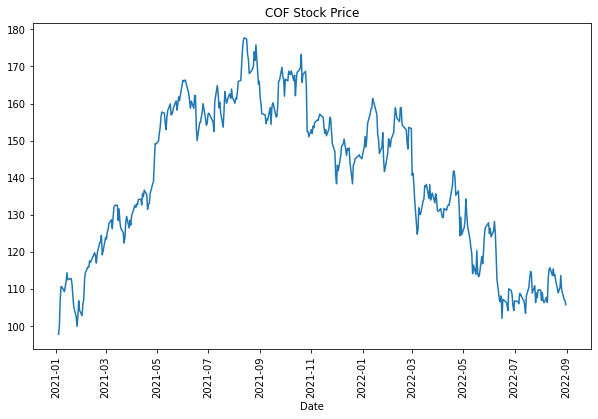

In [ ]:
plt.plot(cof_close)
plt.xlabel('Date')
plt.title('COF Stock Price')
plt.xticks(rotation=90)
plt.show()

In [ ]:
stocks = ['COF']
start = datetime.datetime(2021, 1, 1)
end = datetime.datetime(2022, 9, 1)
port = yf.download(stocks, start=start, end=end, interval='1d')

[*********************100%***********************]  1 of 1 completed


In [ ]:
port.reset_index(inplace=True)
port

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,99.730003,99.989998,96.980003,97.839996,94.769386,3429700
1,2021-01-05,97.790001,100.580002,97.790001,100.139999,96.997200,2171500
2,2021-01-06,103.000000,107.650002,102.559998,107.379997,104.009972,4394000
3,2021-01-07,108.650002,111.540001,108.000000,110.730003,107.254852,4795700
4,2021-01-08,111.000000,111.779999,108.639999,110.559998,107.090172,3001100
...,...,...,...,...,...,...,...
414,2022-08-25,111.190002,113.680000,110.570000,113.660004,113.660004,1565500
415,2022-08-26,114.000000,114.410004,109.680000,109.820000,109.820000,2212200
416,2022-08-29,108.849998,108.930000,106.610001,107.199997,107.199997,2329600
417,2022-08-30,107.970001,108.029999,105.989998,106.830002,106.830002,1542600


In [ ]:
px.line(port,x="Date",y=["High","Low"],title="Difference between high and low prices of COF stocks")

In [ ]:
port['TP'] = (port['Close'] + port['Low'] + port['High'])/3
port['std'] = port['TP'].rolling(20).std(ddof=0)
port['MA-TP'] = port['TP'].rolling(20).mean()
port['BOLU'] = port['MA-TP'] + 2*port['std']
port['BOLD'] = port['MA-TP'] - 2*port['std']

<Figure size 1440x1440 with 0 Axes>

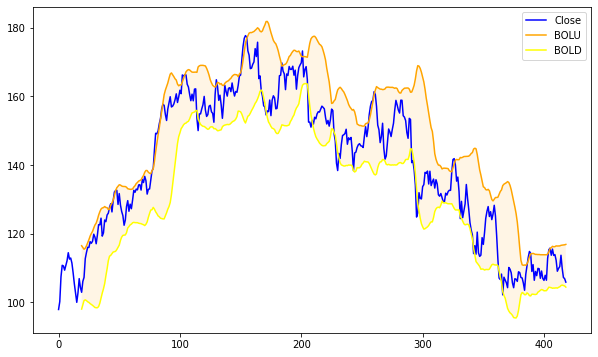

In [ ]:
plt.figure(figsize=(20,20))
ax = port[['Close', 'BOLU', 'BOLD']].plot(color=['blue', 'orange', 'yellow'])
ax.fill_between(port.index, port['BOLD'], port['BOLU'], facecolor='orange', alpha=0.1)
plt.show()

* Bollinger band describes the volatality of the stock if the width of the band is more it shows high volatality so from the above graph we can say that Capital stock has some volatality.
* Here we cannot describe the overbrought or oversold condition because the graph doesn't touch the BOLU or BOLD lines constantly.

In [ ]:
px.line(port,x="Date",y=["Volume"],title="Volume of stock traded")

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=port['Date'],
                open=port['Open'],
                high=port['High'],                     
                low=port['Low'],
                close=port['Close'],
                increasing_line_color= '#FF1700',
                decreasing_line_color= '#06FF00'
                    )])
fig.show()

 * Candle stick helps us to determine the trend of a stock.

* In our graph the COF stock follows a positive trend.


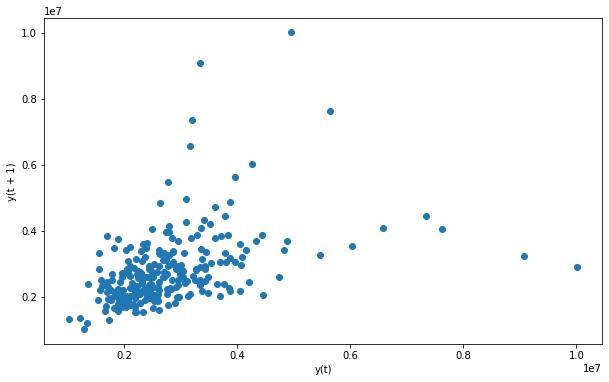

In [ ]:
 from pandas.plotting import lag_plot

lag_plot(port['Volume'].tail(250))



*   Outliers exists in the data.
*   Data is not random there is is no randomness exists in this data.

*   Autocorrelation exists in the data.







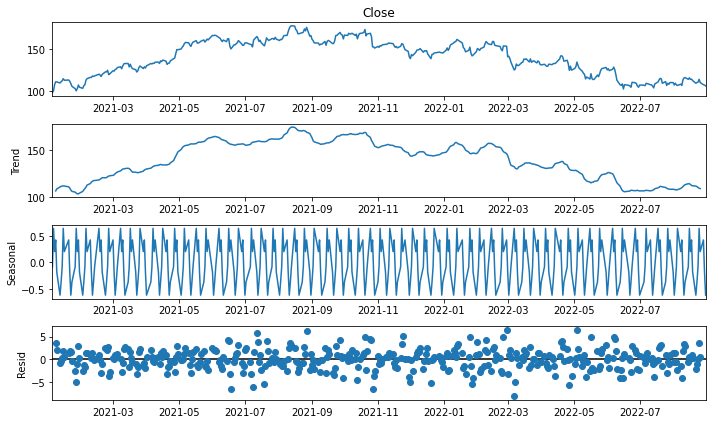

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(cof_close, model='additive', period=7)
decomposition.plot()
plt.show()

- A stationary time series is one whose properties do not depend on the time at which the series is observed. Thus, time series with trends, or with seasonality, are not stationary — the trend and seasonality will affect the value of the time series at different times.
- From the initial observations of the line plot of our stock, I can see that there is a trend in the stock price, we can say that the stock price has a trend till november 2021 and downward trend afterwards.
- Then I plotted the seasonal decompose to see the seasonality of the data, we can see that there are periodical ups and down in the data, so we can say that the data has sesonality as well.
- So, from the initial obeseravtions I make from the plots, my first impression is that the data is not stationary.

In [ ]:
# adf test
from statsmodels.tsa.stattools import adfuller
stat_test = adfuller(cof_close)
print('The test statistic is {} and p-value is {}'.format(stat_test[0],
                                                         stat_test[1]))

The test statistic is -1.7228723738645955 and p-value is 0.4193681349993394


- ADF test is used to check the stationarity of the time series.
- In the unit root test of the ADF, if the unit root is present then the data is non-stationary. So, by ADF hypothesis test if there is a unit root we accept the null hypothesis and if there is no unit root we reject the null hypothesis.
- So we can look at the p-value to check for it. Since the p-value is greater than 0.05, we accept the null hypothesis.
- So we can say that the data is non-stationary.

- The time series is not stationary lets make it stationary.
- In time series, it is common to have non-stationary data and taking difference is a way to make non-stationary data a stationary one. Taking first difference is nothing but taking difference of two successive values. 

In [ ]:
# first difference
cof_diff = cof_close.diff().dropna()

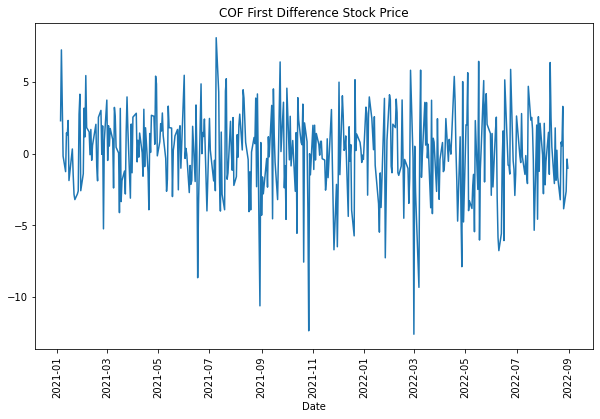

In [ ]:
plt.plot(cof_diff)
plt.xlabel('Date')
plt.title('COF First Difference Stock Price')
plt.xticks(rotation=90)
plt.show()

- We have converted our time series to stationary, now to confirm lets check the stationarity.

In [ ]:
from statsmodels.tsa.stattools import adfuller
stat_test = adfuller(cof_diff)
print('The test statistic is {} and p-value is {}'.format(stat_test[0],
                                                         stat_test[1]))

The test statistic is -20.054509867947463 and p-value is 0.0


- We can see that the p-value is zero, so we reject the null hypothesis, so the time series is stationary.

##Naive Model

In [ ]:
train_len = int(len(cof_close) * 0.8)
train = cof_close[:train_len]
test = cof_close[train_len:]

In [ ]:
prediction = pd.DataFrame()
prediction.index = test.index
prediction['naive_model'] = train[train_len-1]

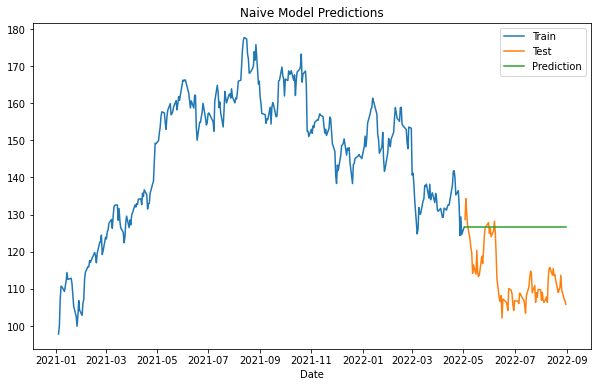

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(prediction['naive_model'], label='Prediction')
plt.title('Naive Model Predictions')
plt.xlabel('Date')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_naive = mean_absolute_error(test, prediction['naive_model'])
mse_naive = mean_squared_error(test, prediction['naive_model'])
rmse_naive = np.sqrt(mean_squared_error(test, prediction['naive_model']))

In [ ]:
naive_perf = {'mae_naive': mae_naive, 'mse_naive':mse_naive, 'rmse_naive':rmse_naive}
naive_perf = pd.DataFrame([naive_perf])
naive_perf

,mae_naive,mse_naive,rmse_naive
0,13.835595,236.261986,15.370816


## Simple Average Model 

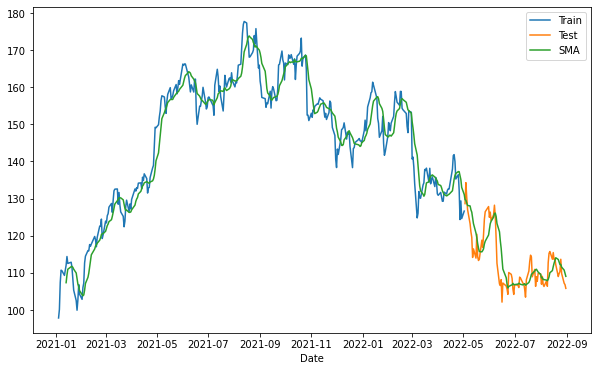

In [ ]:
sma = cof_close.rolling(8).mean()
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(sma.index, sma, label='SMA')
plt.xlabel('Date')
plt.legend()
plt.show()

In [ ]:
sma = sma.dropna()
mae_sma = mean_absolute_error(cof_close.iloc[7:], sma)
mse_sma = mean_squared_error(cof_close.iloc[7:], sma)
rmse_sma = np.sqrt(mean_squared_error(cof_close.iloc[7:], sma))

In [ ]:
sma_perf = {'mae_sma':mae_sma, 'mse_sma':mse_sma, 'rmse_sma':rmse_sma}
sma_perf = pd.DataFrame([sma_perf])
sma_perf

,mae_sma,mse_sma,rmse_sma
0,3.442812,19.884508,4.459205


## Moving Average

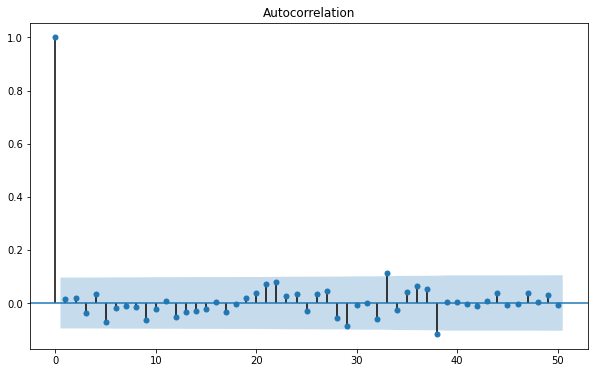

In [ ]:
# autocorrelation function
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(cof_diff, lags=50);

In [ ]:
# Moving Average Model
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# splitting the data into 80 percent training and 20 percent testing
diff_train_len = int(len(cof_diff) *0.8)
diff_train = cof_diff[:diff_train_len]
diff_test = cof_diff[diff_train_len:]

In [ ]:
start = len(diff_train)
end = len(diff_train) + len(diff_test) - 1

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
ma_model = ARIMA(diff_train, order=(0, 0, 33))
ma_results = ma_model.fit()

In [ ]:
ma_pred = ma_results.predict(start, end)
ma_pred.index = diff_test.index 

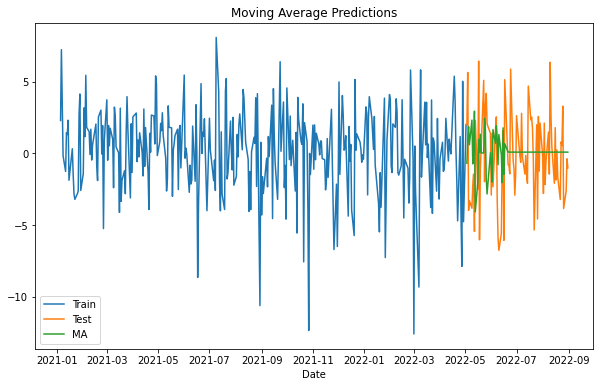

In [ ]:
plt.plot(diff_train.index, diff_train, label='Train')
plt.plot(diff_test.index, diff_test, label='Test')
plt.plot(ma_pred.index, ma_pred, label='MA')
plt.title('Moving Average Predictions')
plt.xlabel('Date')
plt.legend()
plt.show()

In [ ]:
mae_ma = mean_absolute_error(diff_test, ma_pred)
mse_ma = mean_squared_error(diff_test, ma_pred)
rmse_ma = np.sqrt(mean_squared_error(diff_test, ma_pred))

In [ ]:
ma_perf = {'mae_ma':mae_ma, 'mse_ma':mse_ma, 'rmse_ma':rmse_ma}
ma_perf = pd.DataFrame([ma_perf])
ma_perf

,mae_ma,mse_ma,rmse_ma
0,2.674939,11.126247,3.335603


## Autoregressive Model

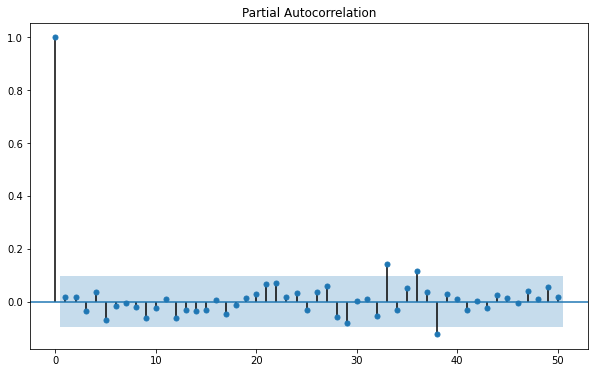

In [ ]:
# partial autocorrelation function
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(cof_diff, lags=50);

In [ ]:
ar_model = ARIMA(diff_train, order=(33, 0, 0))
ar_result = ar_model.fit()
ar_pred = ar_result.predict(start, end)
ar_pred.index = diff_test.index

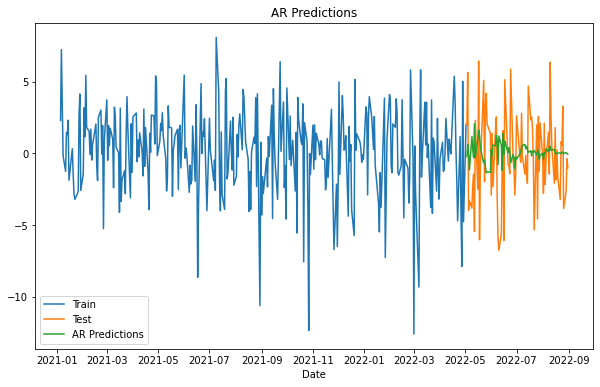

In [ ]:
plt.plot(diff_train.index, diff_train, label='Train')
plt.plot(diff_test.index, diff_test, label='Test')
plt.plot(ar_pred.index, ar_pred, label='AR Predictions')
plt.title('AR Predictions')
plt.xlabel('Date')
plt.legend()
plt.show()

In [ ]:
mae_ar = mean_absolute_error(diff_test, ar_pred)
mse_ar = mean_squared_error(diff_test, ar_pred)
rmse_ar = np.sqrt(mean_squared_error(diff_test, ar_pred))

In [ ]:
ar_perf = {'mae_ar':mae_ar, 'mse_ar':mse_ar, 'rmse_ar':rmse_ar}
ar_perf = pd.DataFrame([ar_perf])
ar_perf

,mae_ar,mse_ar,rmse_ar
0,2.592347,10.356517,3.218154


 ## Simple exponential smoothing

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
ses = SimpleExpSmoothing(train).fit()

In [ ]:
start_raw = len(train)
end_raw = len(train) + len(test) - 1
ses_pred = ses.predict(start_raw, end_raw)
ses_pred.index = test.index

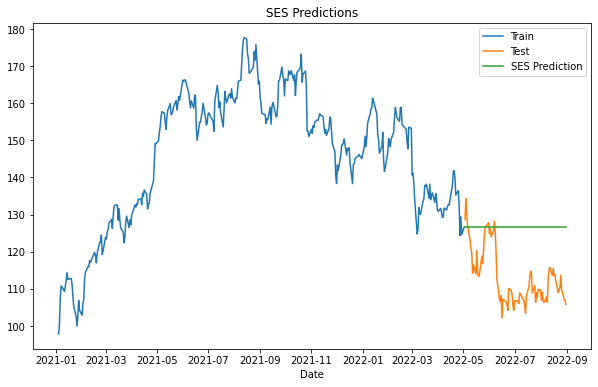

In [ ]:
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(ses_pred.index, ses_pred, label='SES Prediction')
plt.title('SES Predictions')
plt.legend()
plt.xlabel('Date')
plt.show()

In [ ]:
mae_ses = mean_absolute_error(test, ses_pred)
mse_ses= mean_squared_error(test, ses_pred)
rmse_ses = np.sqrt(mean_squared_error(test, ses_pred))

In [ ]:
ses_perf = {'mae_ses':mae_ses, 'mse_ses':mse_ses, 'rmse_ses':rmse_ses}
ses_perf = pd.DataFrame([ses_perf])
ses_perf

,mae_ses,mse_ses,rmse_ses
0,13.835595,236.261986,15.370816


## Double exponential smoothing

In [ ]:
des_model = Holt(train)
des_result = des_model.fit(smoothing_level=0.3, smoothing_slope=.05)

In [ ]:
des_pred = des_result.predict(start_raw, end_raw)
des_pred.index = test.index

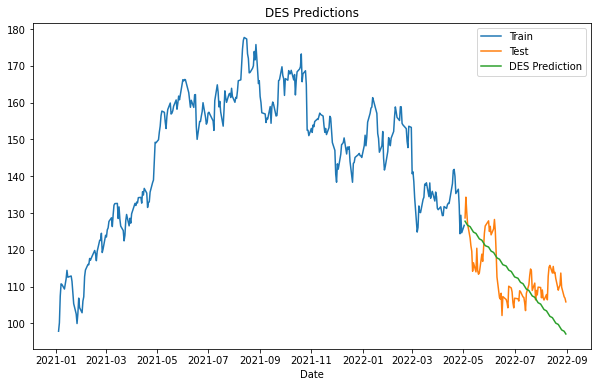

In [ ]:
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(des_pred.index, des_pred, label='DES Prediction')
plt.title('DES Predictions')
plt.legend()
plt.xlabel('Date')
plt.show()

In [ ]:
mae_des = mean_absolute_error(test, des_pred)
mse_des= mean_squared_error(test, des_pred)
rmse_des = np.sqrt(mean_squared_error(test, des_pred))

In [ ]:
des_perf = {'mae_des':mae_des, 'mse_des':mse_des, 'rmse_des':rmse_des}
des_perf = pd.DataFrame([des_perf])
des_perf

,mae_des,mse_des,rmse_des
0,6.620301,58.074707,7.620676


## Holt-Winter Exponential Smoothing

In [ ]:
holt_results = ExponentialSmoothing(train, trend='mul', seasonal=None, damped=True).fit()

In [ ]:
holt_predict = holt_results.predict(start_raw, end_raw)
holt_predict.index = test.index

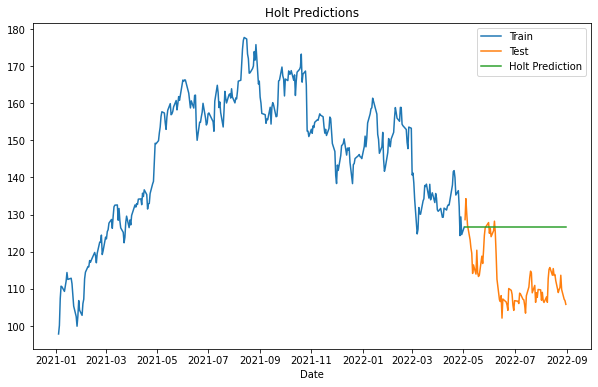

In [ ]:
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(holt_predict.index, holt_predict, label='Holt Prediction')
plt.title('Holt Predictions')
plt.legend()
plt.xlabel('Date')
plt.show()

In [ ]:
mae_holt = mean_absolute_error(test, holt_predict)
mse_holt = mean_squared_error(test, holt_predict)
rmse_holt  = np.sqrt(mean_squared_error(test, holt_predict))

In [ ]:
holt_perf = {'mae_holt':mae_holt, 'mse_holt':mse_holt, 'rmse_holt':rmse_holt}
holt_perf = pd.DataFrame([holt_perf])
holt_perf

,mae_holt,mse_holt,rmse_holt
0,13.835595,236.261985,15.370816


## Forecasting using Autoregressive Model

In [ ]:
ar_model = ARIMA(cof_diff, order= (33, 0 ,0))
ar_result = ar_model.fit()
forecast_index = pd.date_range(diff_test.index[-1], periods=10)
ar_forecast = ar_result.forecast(steps=10)
ar_forecast.index = forecast_index

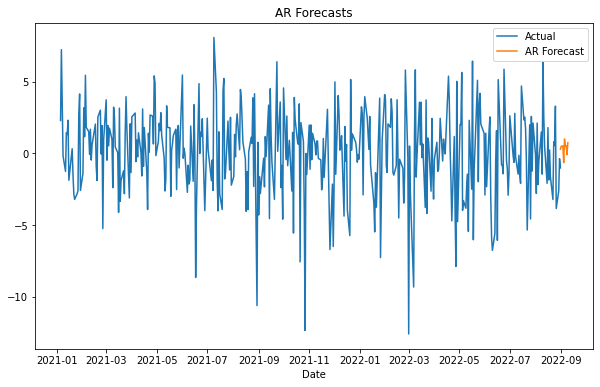

In [ ]:
plt.plot(cof_diff.index, cof_diff, label='Actual')
plt.plot(ar_forecast.index, ar_forecast, label='AR Forecast')
plt.legend()
plt.xlabel('Date')
plt.title('AR Forecasts')
plt.show()